In [76]:
# import import_ipynb
from classes import *
import classes
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, UpSampling2D, Input, Convolution2D, Reshape

known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/spcup_2022_training_part1'
unknown_volume_path = './spcup_2022_unseen'




rs = 10
known_path, known_labels = file_path_list(known_volume_path)
unknown_path, unknown_labels = file_path_list(unknown_volume_path)
##train set
# print('raw train_set_num :',len(labels))
X_train_path, X_test_path, y_train_raw, y_test_raw = train_test_split(np.array(known_path),
                                                                      known_labels, test_size=0.2,
                                                                      stratify = known_labels, random_state=rs)


n_mels = 64

# train = classes.data(X_train_path, y_train_raw, n_mels=n_mels, known = True)
# # X_train,y_train = train.extract_mel(sampling_rate,n_mels)
#
# test = classes.data(X_test_path, y_test_raw, n_mels=n_mels, known = True)
# # X_test,y_test = test.extract_mel(sampling_rate,n_mels)
#
# unseen = data(unknown_path, unknown_labels, n_mels=n_mels, known = False)

n = -1
train = classes.data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

test = classes.data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

unseen =data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)


train_t = train.X_split.transpose((0, 2, 1))
test_t = test.X_split.transpose((0, 2, 1))
unseen_t = unseen.X_split.transpose((0, 2, 1))


In [48]:
X_train = train.X_split.reshape((train.X_split.shape[0],1,train.X_split.shape[1],train.X_split.shape[2]))
X_test = test.X_split.reshape(( test.X_split.shape[0],1,test.X_split.shape[1],test.X_split.shape[2]))
X_unseen = unseen.X_split.reshape((unseen.X_split.shape[0],1, unseen.X_split.shape[1],unseen.X_split.shape[2]))
print(X_train.shape)
print(train.X_split.shape

(68, 1, 64, 32)
(68, 64, 32)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (LSTM)             (None, 16, 64)            33024     
_________________________________________________________________
encoder_2 (LSTM)             (None, 16, 32)            12416     
_________________________________________________________________
encoder_3 (LSTM)             (None, 16, 16)            3136      
_________________________________________________________________
decoder_1 (LSTM)             (None, 16, 16)            2112      
_________________________________________________________________
decoder_2 (LSTM)             (None, 16, 32)            6272      
_________________________________________________________________
decoder_3 (LSTM)             (None, 16, 64)            24832     
_________________________________________________________________
time_distributed (TimeDistri (None, 16, 64)            4

646/646 [==============================] - 18s 28ms/step - loss: 21.1241 - val_loss: 22.3035
Epoch 132/1000
646/646 [==============================] - 22s 33ms/step - loss: 23.7374 - val_loss: 22.0787
Epoch 133/1000
646/646 [==============================] - 23s 35ms/step - loss: 20.6660 - val_loss: 24.4735
Epoch 134/1000
646/646 [==============================] - 23s 36ms/step - loss: 21.6882 - val_loss: 21.7705
Epoch 135/1000
646/646 [==============================] - 23s 35ms/step - loss: 20.8422 - val_loss: 21.7063
Epoch 136/1000
646/646 [==============================] - 24s 37ms/step - loss: 20.5299 - val_loss: 22.0968
Epoch 137/1000
646/646 [==============================] - 22s 35ms/step - loss: 20.3985 - val_loss: 22.1693
Epoch 138/1000
646/646 [==============================] - 24s 36ms/step - loss: 21.5324 - val_loss: 21.0508
Epoch 139/1000
646/646 [==============================] - 22s 34ms/step - loss: 21.2325 - val_loss: 21.0371
Epoch 140/1000
646/646 [===================

Epoch 282/1000
646/646 [==============================] - 22s 34ms/step - loss: 12.8161 - val_loss: 12.5855
Epoch 283/1000
646/646 [==============================] - 21s 32ms/step - loss: 11.7033 - val_loss: 13.7535
Epoch 284/1000
646/646 [==============================] - 19s 30ms/step - loss: 12.8108 - val_loss: 14.5590
Epoch 285/1000
646/646 [==============================] - 21s 33ms/step - loss: 14.0814 - val_loss: 12.1348
Epoch 286/1000
646/646 [==============================] - 19s 30ms/step - loss: 11.8573 - val_loss: 13.0195
Epoch 287/1000
646/646 [==============================] - 20s 31ms/step - loss: 12.7604 - val_loss: 12.4196
Epoch 288/1000
646/646 [==============================] - 17s 27ms/step - loss: 12.1375 - val_loss: 13.3210
Epoch 289/1000
646/646 [==============================] - 19s 29ms/step - loss: 12.8674 - val_loss: 12.5449
Epoch 290/1000
646/646 [==============================] - 14s 22ms/step - loss: 13.0920 - val_loss: 13.3244
Epoch 291/1000
646/646 [====

Epoch 358/1000
646/646 [==============================] - 25s 38ms/step - loss: 10.4136 - val_loss: 10.9334
Epoch 359/1000
646/646 [==============================] - 22s 33ms/step - loss: 11.0791 - val_loss: 12.2816
Epoch 360/1000
646/646 [==============================] - 24s 38ms/step - loss: 11.2474 - val_loss: 11.5533
Epoch 361/1000
646/646 [==============================] - 24s 37ms/step - loss: 11.8049 - val_loss: 11.7784
Epoch 362/1000
646/646 [==============================] - 22s 33ms/step - loss: 10.7719 - val_loss: 11.4968
Epoch 363/1000
646/646 [==============================] - 22s 33ms/step - loss: 11.0242 - val_loss: 11.9268
Epoch 364/1000
646/646 [==============================] - 23s 36ms/step - loss: 10.4852 - val_loss: 11.5378
Epoch 365/1000
646/646 [==============================] - 22s 34ms/step - loss: 10.9226 - val_loss: 11.2237
Epoch 366/1000
646/646 [==============================] - 23s 35ms/step - loss: 11.4993 - val_loss: 11.4454
Epoch 367/1000
646/646 [====

Epoch 434/1000
646/646 [==============================] - 16s 24ms/step - loss: 10.1727 - val_loss: 11.0226
Epoch 435/1000
646/646 [==============================] - 22s 33ms/step - loss: 9.9510 - val_loss: 10.6300
Epoch 436/1000
646/646 [==============================] - 13s 20ms/step - loss: 10.7148 - val_loss: 10.6519
Epoch 437/1000
646/646 [==============================] - 16s 25ms/step - loss: 9.3507 - val_loss: 10.2348
Epoch 438/1000
646/646 [==============================] - 22s 34ms/step - loss: 10.1366 - val_loss: 10.0491
Epoch 439/1000
646/646 [==============================] - 18s 28ms/step - loss: 9.8285 - val_loss: 10.0474
Epoch 440/1000
646/646 [==============================] - 13s 20ms/step - loss: 10.0577 - val_loss: 10.1647
Epoch 441/1000
646/646 [==============================] - 13s 20ms/step - loss: 9.7832 - val_loss: 9.9551
Epoch 442/1000
646/646 [==============================] - 13s 20ms/step - loss: 10.3396 - val_loss: 10.5419
Epoch 443/1000
646/646 [=========

646/646 [==============================] - 24s 38ms/step - loss: 8.6368 - val_loss: 10.7878
Epoch 588/1000
646/646 [==============================] - 24s 37ms/step - loss: 9.6879 - val_loss: 10.1232
Epoch 589/1000
646/646 [==============================] - 24s 38ms/step - loss: 9.9567 - val_loss: 8.7929
Epoch 590/1000
646/646 [==============================] - 24s 37ms/step - loss: 9.2759 - val_loss: 8.9075
Epoch 591/1000
646/646 [==============================] - 19s 29ms/step - loss: 7.8532 - val_loss: 9.0860
Epoch 592/1000
646/646 [==============================] - 17s 26ms/step - loss: 8.7953 - val_loss: 8.6410
Epoch 593/1000
646/646 [==============================] - 24s 37ms/step - loss: 9.4844 - val_loss: 9.3495
Epoch 594/1000
646/646 [==============================] - 24s 37ms/step - loss: 8.1304 - val_loss: 9.9153
Epoch 595/1000
646/646 [==============================] - 24s 37ms/step - loss: 8.2610 - val_loss: 9.2707
Epoch 596/1000
646/646 [==============================] - 1

646/646 [==============================] - 16s 25ms/step - loss: 8.0601 - val_loss: 8.1145
Epoch 742/1000
646/646 [==============================] - 14s 22ms/step - loss: 7.6751 - val_loss: 8.7777
Epoch 743/1000
646/646 [==============================] - 20s 31ms/step - loss: 8.2297 - val_loss: 9.4869
Epoch 744/1000
646/646 [==============================] - 19s 30ms/step - loss: 7.7708 - val_loss: 8.3144
Epoch 745/1000
646/646 [==============================] - 20s 31ms/step - loss: 7.8939 - val_loss: 8.6590
Epoch 746/1000
646/646 [==============================] - 20s 30ms/step - loss: 7.4086 - val_loss: 8.1423
Epoch 747/1000
646/646 [==============================] - 15s 22ms/step - loss: 8.5714 - val_loss: 8.2221
Epoch 748/1000
646/646 [==============================] - 14s 22ms/step - loss: 8.5339 - val_loss: 10.4027
Epoch 749/1000
646/646 [==============================] - 16s 25ms/step - loss: 7.7278 - val_loss: 8.2298
Epoch 750/1000
646/646 [==============================] - 19

646/646 [==============================] - 13s 20ms/step - loss: 7.2398 - val_loss: 8.2429
Epoch 896/1000
646/646 [==============================] - 18s 28ms/step - loss: 6.9633 - val_loss: 7.5236
Epoch 897/1000
646/646 [==============================] - 12s 19ms/step - loss: 7.2605 - val_loss: 7.9590
Epoch 898/1000
646/646 [==============================] - 13s 19ms/step - loss: 7.5456 - val_loss: 9.0063
Epoch 899/1000
646/646 [==============================] - 12s 19ms/step - loss: 7.8361 - val_loss: 8.1480
Epoch 900/1000
646/646 [==============================] - 13s 19ms/step - loss: 7.1596 - val_loss: 9.6246
Epoch 901/1000
646/646 [==============================] - 12s 19ms/step - loss: 7.9775 - val_loss: 8.4701
Epoch 902/1000
646/646 [==============================] - 12s 19ms/step - loss: 7.9338 - val_loss: 8.9330
Epoch 903/1000
646/646 [==============================] - 13s 20ms/step - loss: 7.4409 - val_loss: 7.9718
Epoch 904/1000
646/646 [==============================] - 12s

Text(0.5, 0, 'Epoch')

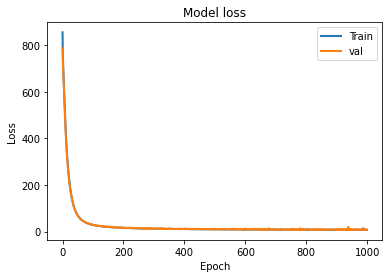

In [3]:
import pandas as pd
import numpy as np



epochs = 100
batch_size = 64
window_length = 16
feats = n_mels


model = keras.Sequential()
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', input_shape=(window_length, feats), return_sequences=True, name='encoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='encoder_2'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='encoder_3'))
# model.add(keras.layers.RepeatVector(window_length, name='encoder_decoder_bridge'))
model.add(keras.layers.LSTM(16, kernel_initializer='he_uniform', return_sequences=True, name='decoder_1'))
model.add(keras.layers.LSTM(32, kernel_initializer='he_uniform', return_sequences=True, name='decoder_2'))
model.add(keras.layers.LSTM(64, kernel_initializer='he_uniform', return_sequences=True, name='decoder_3'))
model.add(keras.layers.TimeDistributed(keras.layers.Dense(feats)))

model.compile(loss="mse",optimizer='adam')

model.build()
print(model.summary())


early_stop = tf.keras.callbacks.EarlyStopping( monitor='val_loss', min_delta=0.1,
                                              patience=100, verbose=1, mode='min', restore_best_weights=True)

history = model.fit(x=train_t, y=train_t, validation_split = 0.2, epochs=1000, batch_size=batch_size, shuffle=True, callbacks=[early_stop]).history



plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='val')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch') #plt.ylim(ymin=0.70,ymax=1) plt.show()

In [1]:
model.save("./models_log" + "/" + "mfcc_LSTM_autoencoder_spcup.h5")


NameError: name 'model' is not defined

In [10]:
new_m = tf.keras.models.load_model('./models_log/LSTM_autoencoder_spcup.h5')
new_m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_1 (LSTM)             (None, 16, 64)            33024     
_________________________________________________________________
encoder_2 (LSTM)             (None, 16, 32)            12416     
_________________________________________________________________
encoder_3 (LSTM)             (None, 16, 16)            3136      
_________________________________________________________________
decoder_1 (LSTM)             (None, 16, 16)            2112      
_________________________________________________________________
decoder_2 (LSTM)             (None, 16, 32)            6272      
_________________________________________________________________
decoder_3 (LSTM)             (None, 16, 64)            24832     
_________________________________________________________________
time_distributed (TimeDistri (None, 16, 64)            4

In [28]:
print(test_t.shape)
print(mse_test.shape)
print(mse_test[0])

(6460, 32, 64)
(6460, 64)
[-7.43468031e-02  5.08537367e-02 -3.36262167e-01  2.56908864e-01
  3.54959726e-01  1.37092590e+00 -1.62134445e+00 -3.90718699e-01
  7.45697618e-01 -6.87825441e-01 -1.03341126e+00  1.08183995e-01
 -2.94540226e-02  9.03362155e-01  4.82404768e-01 -2.38186613e-01
 -6.63390338e-01  2.63847947e-01 -5.57700694e-01 -6.81811213e-01
  3.05552110e-02 -1.37812406e-01  8.33552778e-02 -3.63388024e-02
 -7.60065615e-02  1.04776271e-01  1.39151245e-01 -1.92988694e-01
 -1.49630278e-03  1.99910074e-01  6.27901971e-01  9.13563192e-01
  3.49049307e-02  1.12823419e-01  2.54184484e-01 -3.11305095e-02
 -1.04529373e-02  8.79824683e-02  1.92759916e-01  6.83709309e-02
  2.95519382e-01  2.47543842e-01  2.03087956e-01  1.41035959e-01
  2.16236979e-01  1.15204543e-01  4.18784842e-02  3.32454666e-02
  2.29063760e-02  2.86915191e-02  3.49419974e-02  3.32040340e-02
 -8.75356048e-03 -2.19964646e-02 -1.49305817e-02 -6.00019991e-02
 -7.00854063e-02 -5.55811934e-02  1.44210123e-02  1.19429259e-02

In [72]:
# data_or= []
# labels_or = []
# def order_data(data, labels):
#     data = np.array(data)
#     for i in range(5):
# #         print(labels == i)
#         data_or.append(data[labels == i])
#         labels_or.append(labels[labels==i])
#     return np.array(data_or).reshape((1,-1))[0], np.array(labels_or).reshape((1,-1))[0]


# known_volume_path = 'C:/Users/GJ/Desktop/연구실/2022SPCUP/WAV_Ordered train set'
# X_train_path, y_train_raw = order_data(known_path, known_labels)

# known_path, known_labels = file_path_list(known_volume_path)

# unknown_path, unknown_labels = file_path_list(unknown_volume_path)


# X_train_path, y_train_raw = order_data(known_path, known_labels)

# n_mels = 64
# n = -1
# train = classes.data(X_train_path[:n],y_train_raw[:n],n_mels=n_mels, known = True)

# # test = classes.data(X_test_path[:n],y_test_raw[:n], n_mels=n_mels, known = True)

# unseen =data(unknown_path[:n],unknown_labels[:n], n_mels=n_mels, known = False)


# train_t = train.X_split.transpose((0, 2, 1))
# # test_t = test.X_split.transpose((0, 2, 1))
# unseen_t = unseen.X_split.transpose((0, 2, 1))


In [77]:
print(len(X_train_path))

4000


In [78]:
from scipy.stats import mode
test_x_predictions = model.predict(test_t)
unseen_x_predictions = model.predict(unseen_t)
print(test_x_predictions.shape)
print(unseen_x_predictions.shape)

(6460, 32, 64)
(6275, 32, 64)


In [ ]:
sum_all_mse = np.sum(all_mse)

(6460, 32, 64)
(6460, 64)
(6275, 32, 64)
(6275, 64)
all_mse.shape :  (12735, 64)


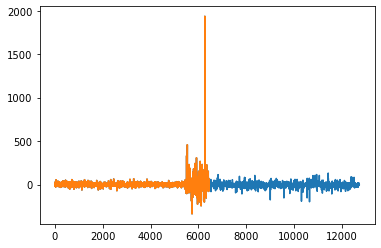

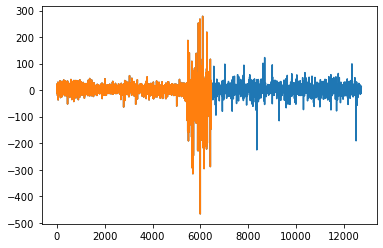

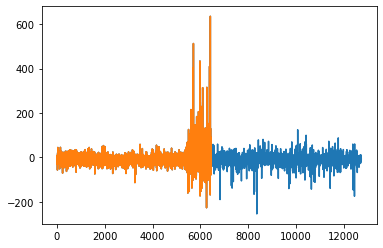

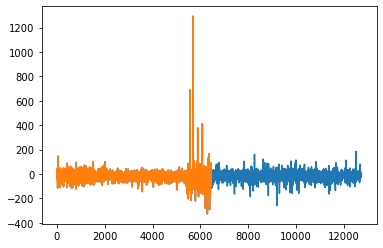

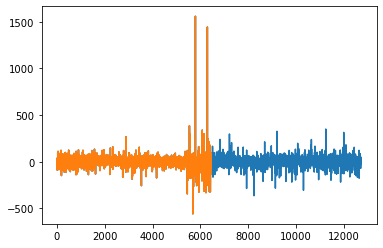

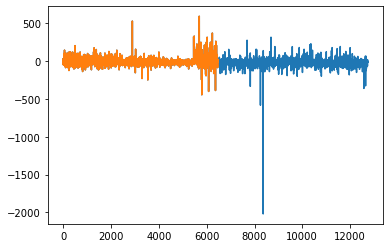

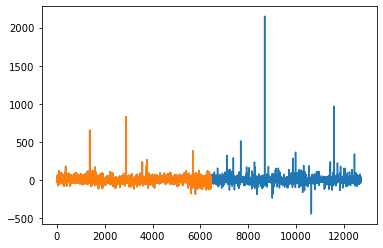

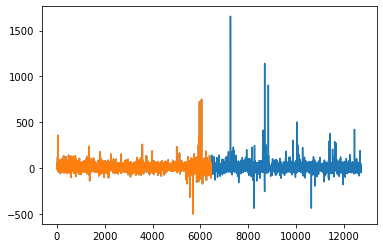

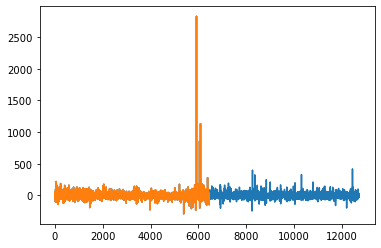

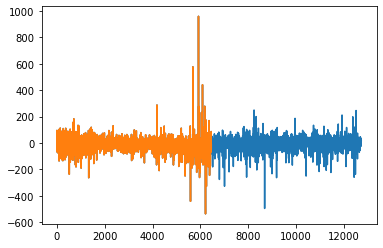

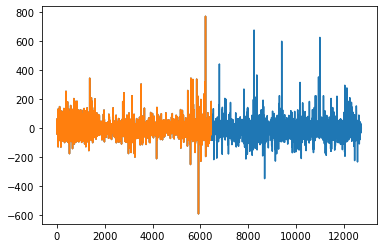

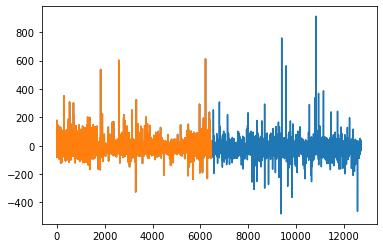

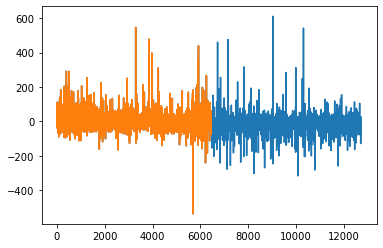

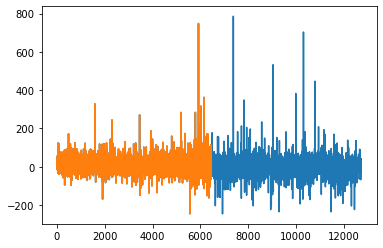

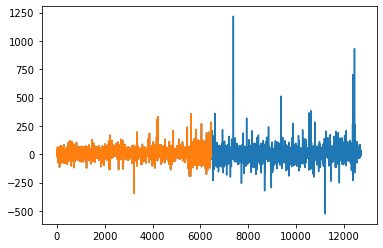

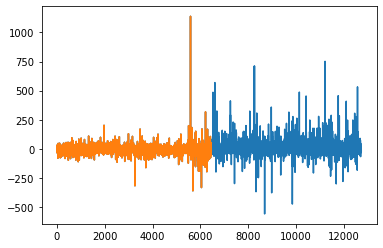

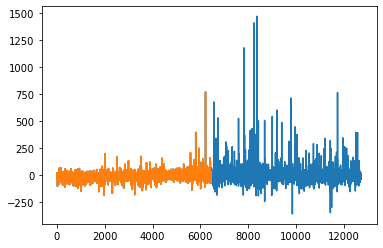

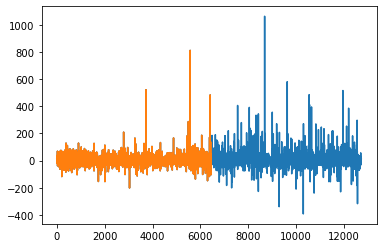

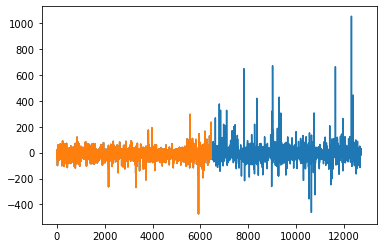

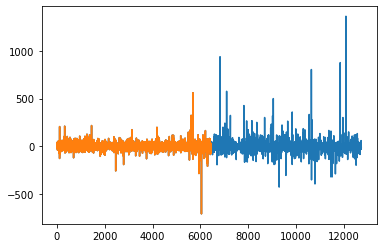

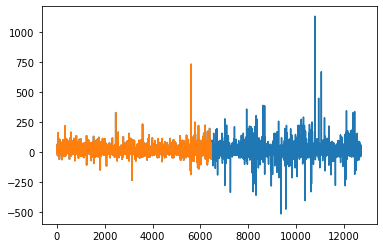

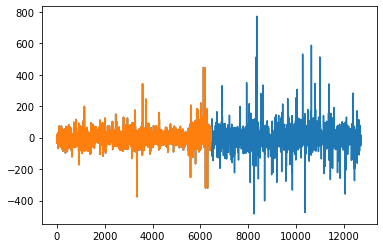

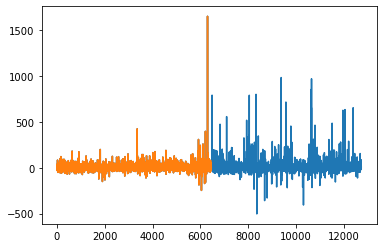

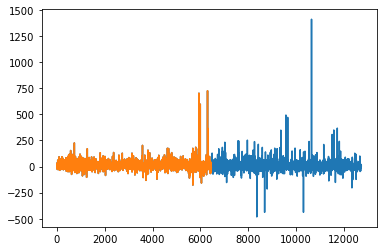

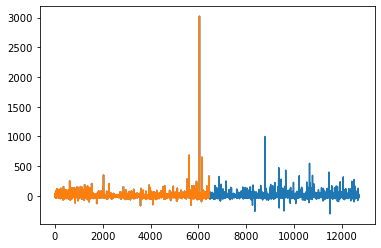

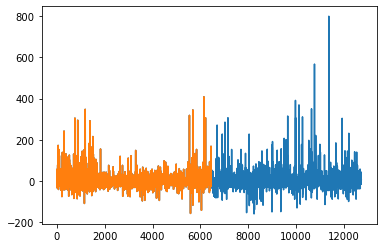

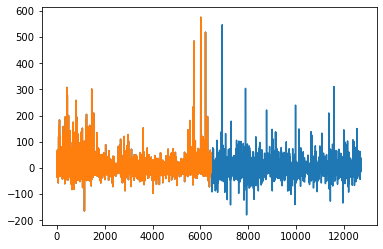

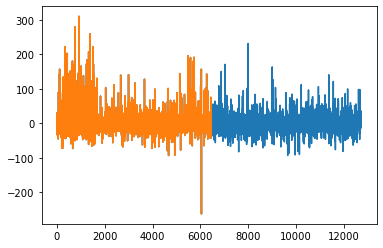

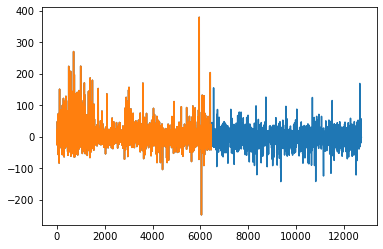

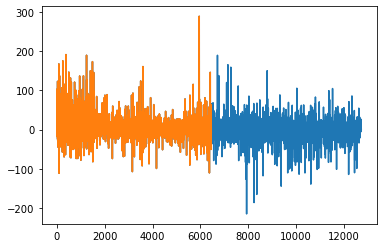

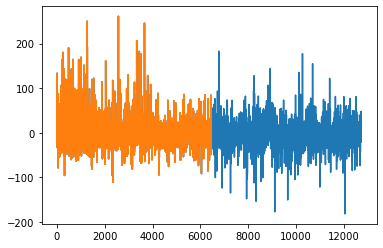

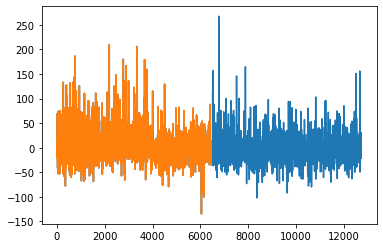

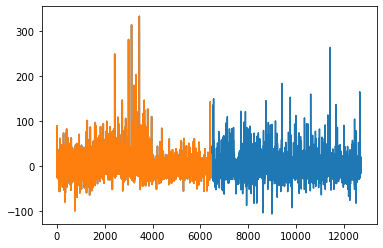

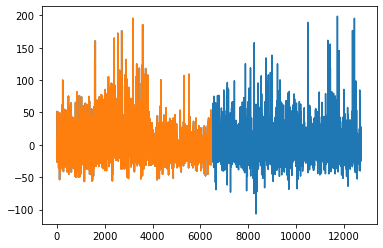

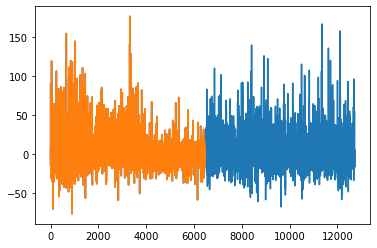

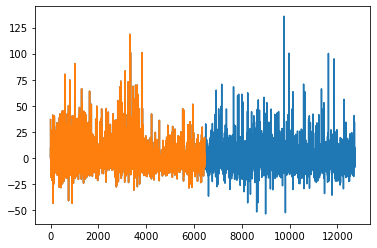

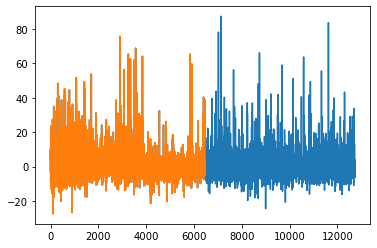

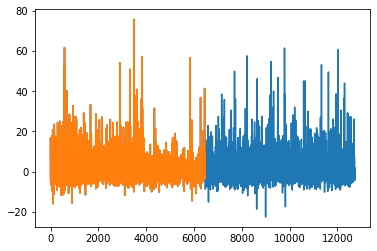

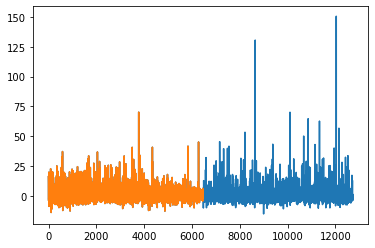

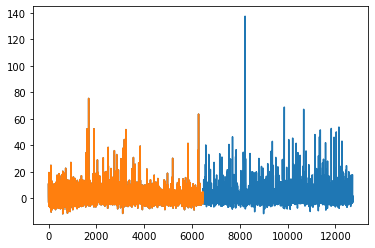

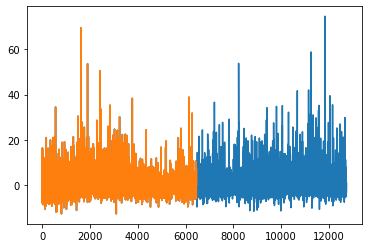

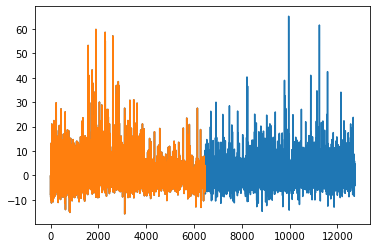

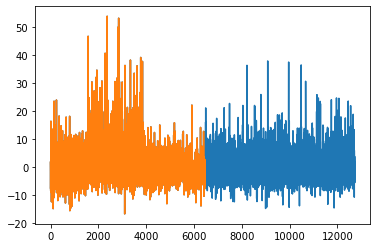

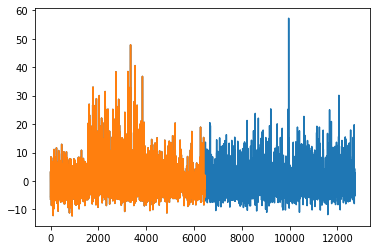

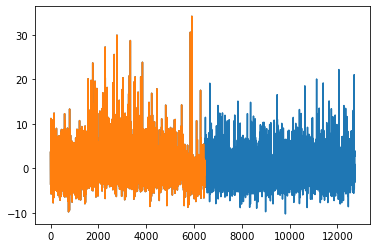

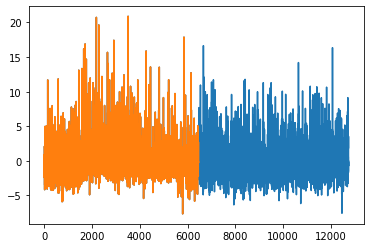

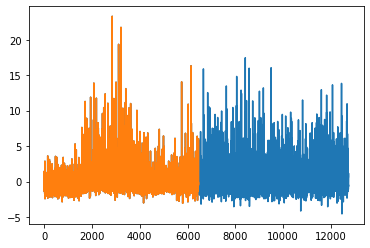

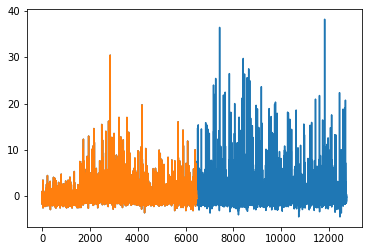

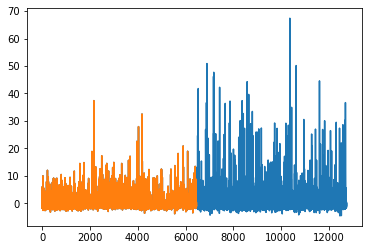

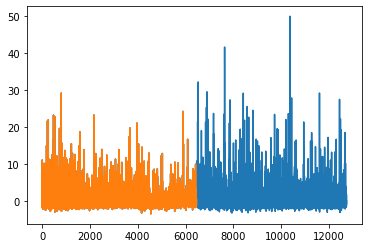

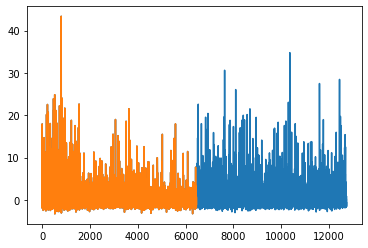

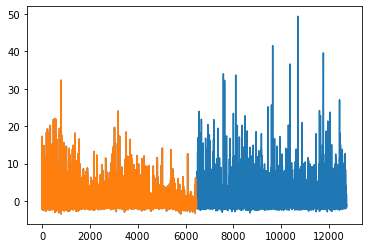

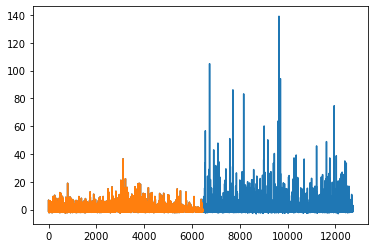

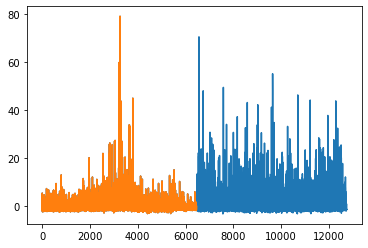

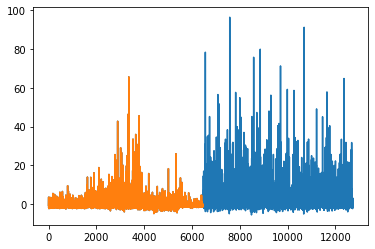

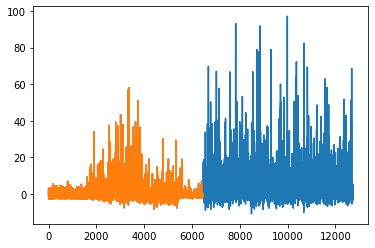

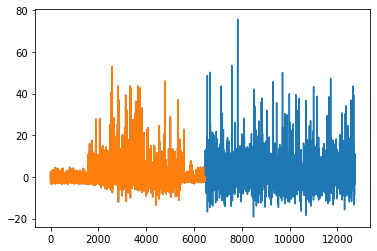

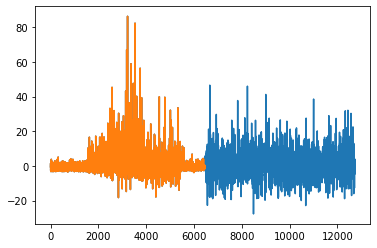

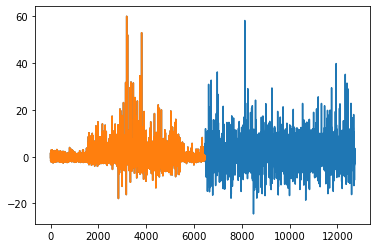

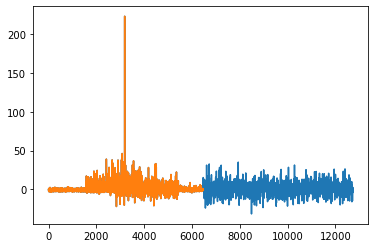

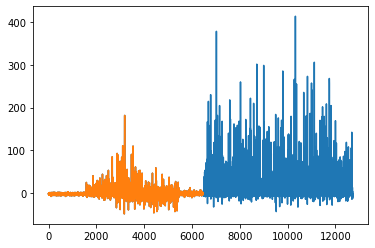

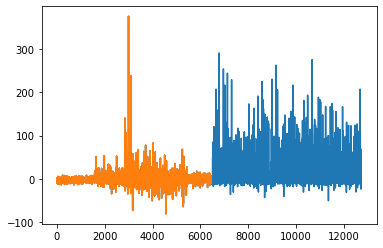

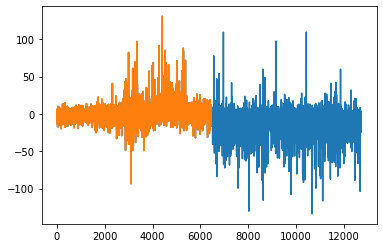

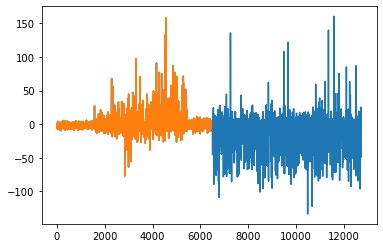

In [114]:

print(test_x_predictions.shape)
# mse_test = np.sqrt(np.mean(np.power(test_t - test_x_predictions, 2), axis=2))
mse_test = np.sum(np.power(test_t - test_x_predictions, 1), axis=1)
# mse_test = np.sum(np.sum(np.power(test_t - test_x_predictions, 1), axis=1),axis =1 )

print(mse_test.shape)

print(unseen_x_predictions.shape)
# mse_unseen = np.sqrt(np.mean(np.power(unseen_t - unseen_x_predictions, 2), axis=2))
mse_unseen = np.sum(np.power(unseen_t - unseen_x_predictions, 1), axis=1)
# mse_unseen = np.sum(np.sum(np.power(unseen_t - unseen_x_predictions, 1), axis=1),axis =1 )

print(mse_unseen.shape)
# print((test.labels == 0).shape)

all_mse = np.concatenate((mse_test[test.y_split == 0],mse_test[test.y_split == 1],mse_test[test.y_split == 2],
                          mse_test[test.y_split == 3],mse_test[test.y_split == 4],mse_unseen),axis = 0)
print('all_mse.shape : ', all_mse.shape)

for i in range(all_mse.shape[1]):
    plt.subplot()
    plt.plot(all_mse[:,i])
    plt.plot(all_mse[:6460,i])
    
    plt.show()
    
# plt.subplot()
# plt.plot(all_mse)
# plt.plot(all_mse[:6460])
# plt.show()

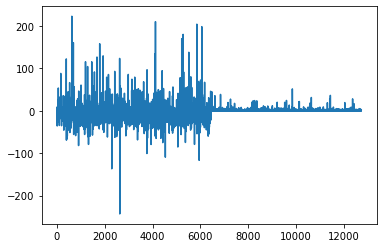

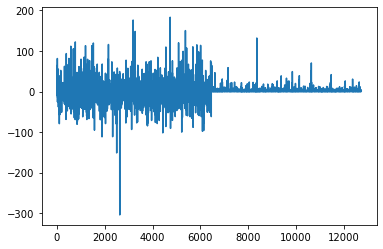

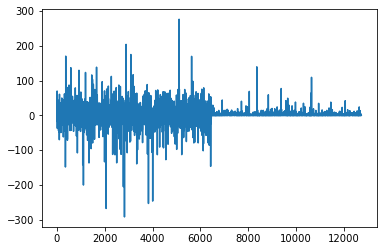

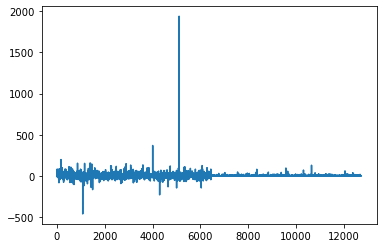

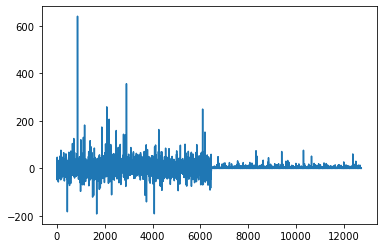

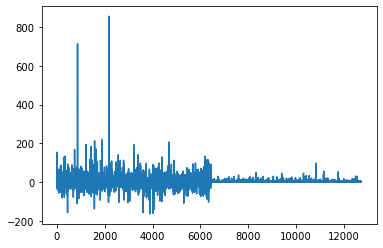

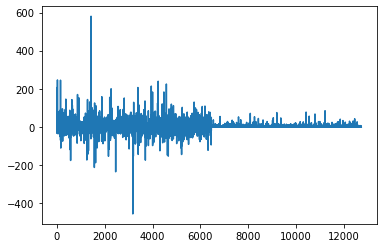

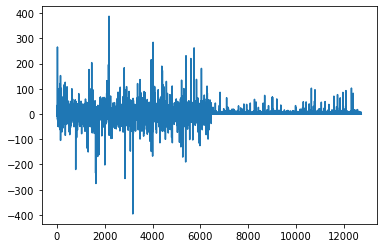

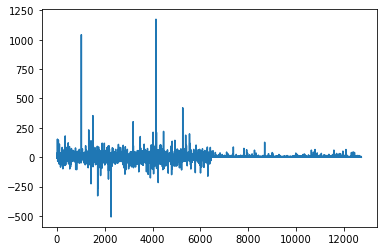

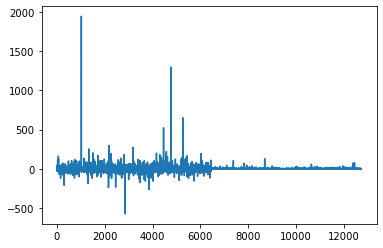

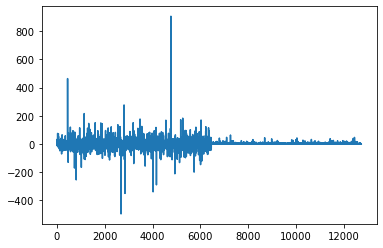

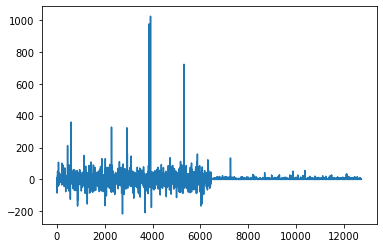

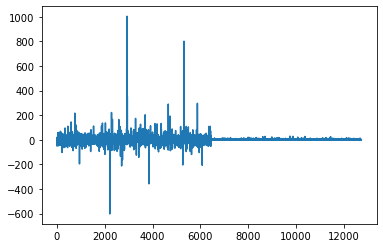

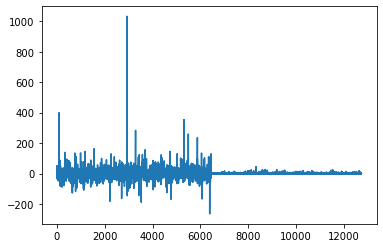

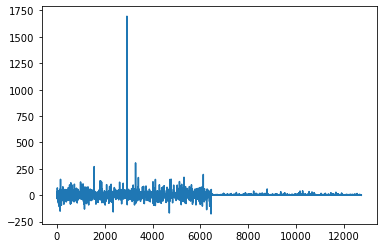

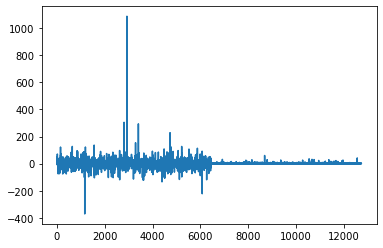

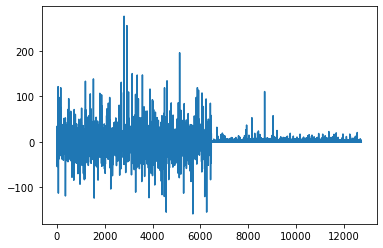

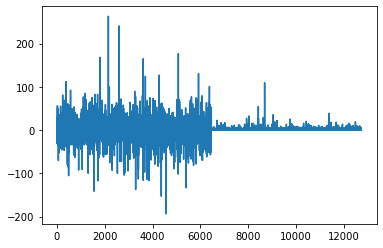

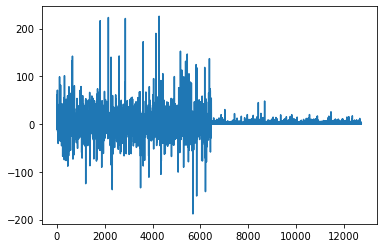

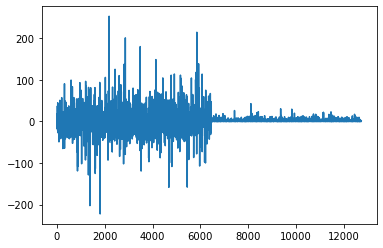

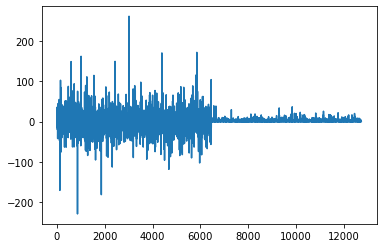

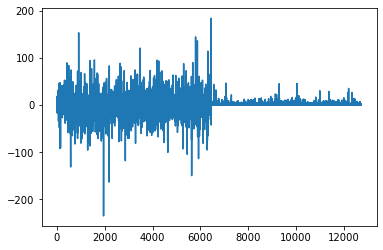

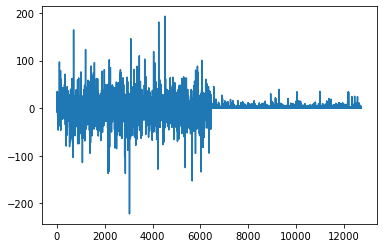

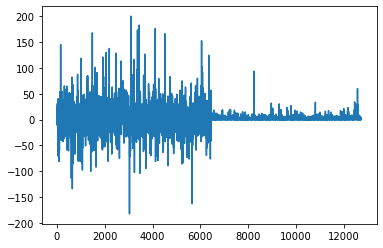

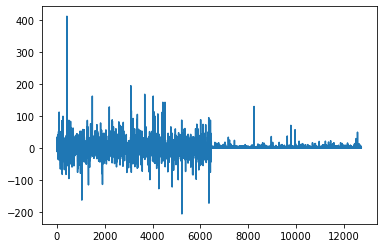

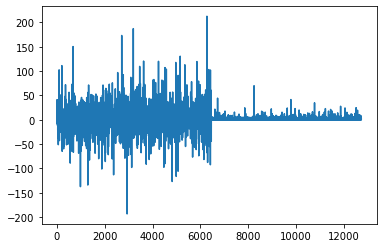

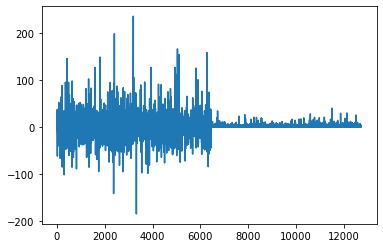

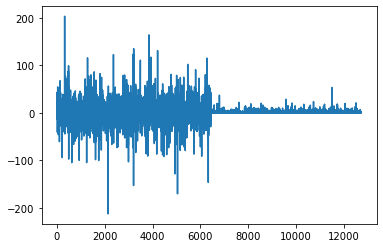

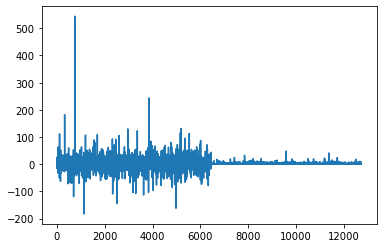

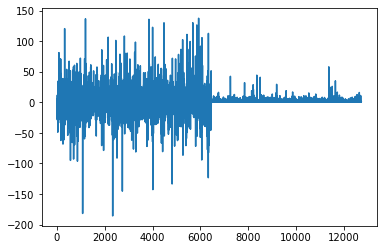

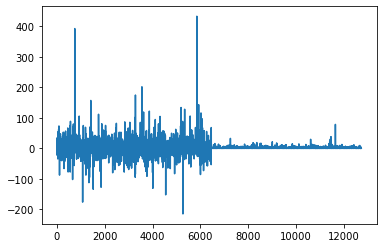

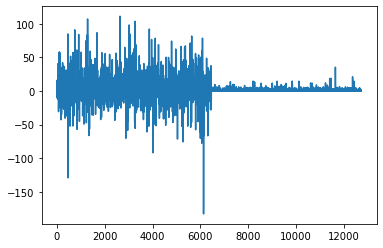

In [52]:
for i in range(all_mse.shape[1]):
    plt.subplot()
    plt.plot(all_mse[:,i])
    plt.show()

In [24]:
test_x_predictions.shape

(6460, 32, 64)

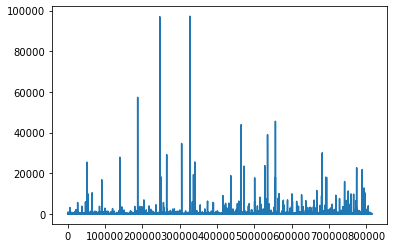

In [23]:
plt.plot(all_mse)

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

print((train.X_split.shape))
model = Sequential()
'''
#model 1
model.add(layers.BatchNormalization(input_shape=(X_train.shape[1:])))
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(layers.Dense(5, activation='softmax'))
'''
#model 2
model.add(layers.BatchNormalization(input_shape=(train.X_split)))
model.add(layers.Conv2D(filters=16, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPool2D(pool_size=(5, 5)))
model.add(Flatten())
model.add(layers.Dense(5, activation=None))
model.add(layers.Activation('softmax'))

model.summary()

(68, 64, 32)


TypeError: only integer scalar arrays can be converted to a scalar index